# Machine Learning
## week 1: What is machine learning?
Ability to learn without being explicitly programmed
Algorithms that automatically improve performance through experience based on the data presented
Want a model that takes input and gives output:

y = f(x)

Training in machine learning repeatedly does the same procedure over and over until we get the parameters we think are best.

Machine learning seeks an algorithm that learns a particular task well and should result in a system that carries out the task correctly on most occasions.

We gather the data labelling it as a pair of information, where y is the correct answer for each x. X is collection of all features.

MNIST data set used to recognise handwritten letters. Made up to 60,000 samples. The dataset presents xi as the hand-written letter 4 then yi = (0, 0, 0, 0, 1, 0, 0, 0, 0, 0). or the yi may be presented as a probability.

High profile examples:
* Dall-E
* Chat GPT
* Gemini
* Mid-journey

### Supervised Learning
Techniques where we have training examples where we know the correct result 
(the y values). Different types of supervised learning are:
▪ Classification - discrete data eg cat or dog
▪ Regression - continuous data

### Unsupervised learning
no “right” answer known, but the algorithm tries to find 
some structure/patterns in the data.
▪ Principal Component Analysis (Dimensionality Reduction) 
▪ k-mean Clustering
▪ PageRank (Google)

Will group things together byt we do not necessarily know what the groups are.

### reinforcement learning
Works on associating data

## What do we need for machine learning?
▪ The Task - define or limit the task
▪ The Experience - This is the data, more data = more experience 
▪ The Performance measure - We need a good way to measure this.
▪ The Learning Algorithm - The recipe by which we will improve our performance. 
▪ The Intelligence - the Network - the brain

## Regression
Horizontal is the independent variable eg time
Vertical axis present the dependent variable eg house price

### Linear relationships
A change in x produces the same proportionate change in the value of y
y = mx + c

or y = w0 + w1x

Our notation convention:
y = output
x = input
w = parameters used in training


Before finding a regression line for a set of data points draw a scatterplot. If the data do not appear to be scattered about a line, do not determine a regression line.



When training the model we are trying to reduce the error between the prediction and the actual. This is often calculated with the mean squared error

m = number of samples

y^i = prediction for the i-th sample and yi is the correct answer for that sample


Sum up all the errors

Usually, a method called gradient descent is used to solve this (later!), that does multiple iterations to find the best parameters. When we use the .fit() methods in scikit-learn and Tensorflow this is what happens.

.fit() in sci-kit learn

[https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

## Building a model
We have a set of data, that is a pair of information. We know the correct answer for 
the set.
▪ X is the set of all inputs (a matrix).
▪ y is the set of all corresponding response variables. 
▪ A particular yi is the result for a particular xi

In [ ]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X,y)
predictions = lr.predict(X)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
X = np.array([5,7,9,11,13,15])
y = np.array([11,14,20,24,29,31])

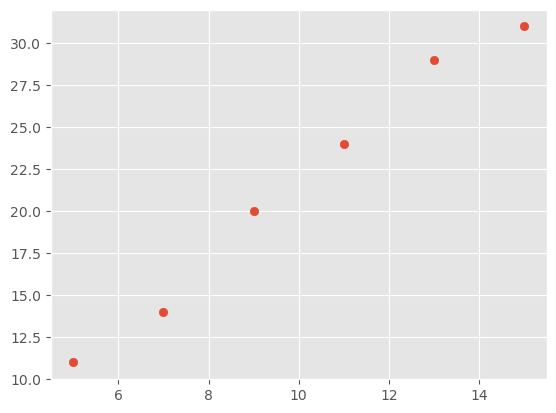

In [6]:
plt.scatter(X,y)
plt.show()

Check correlation coefficient

In [7]:
np.corrcoef(X,y)

array([[1.        , 0.99322298],
       [0.99322298, 1.        ]])

Need to reshape X so it is a 2d array

In [8]:
X = X.reshape(-1,1)

In [9]:
X.shape

(6, 1)

In [10]:
X.ndim

2

Build the model

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model = LinearRegression()

In [13]:
model.fit(X,y)

LinearRegression()

Query the model


In [14]:
model.coef_

array([2.12857143])

In [15]:
model.intercept_

0.2142857142857153

In [16]:
pred = model.predict(X)

In [17]:
pred

array([10.85714286, 15.11428571, 19.37142857, 23.62857143, 27.88571429,
       32.14285714])

Evaluate

In [18]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [19]:
mse(y,pred)

0.723809523809522

In [20]:
r2(y,pred)

0.9864918906909576

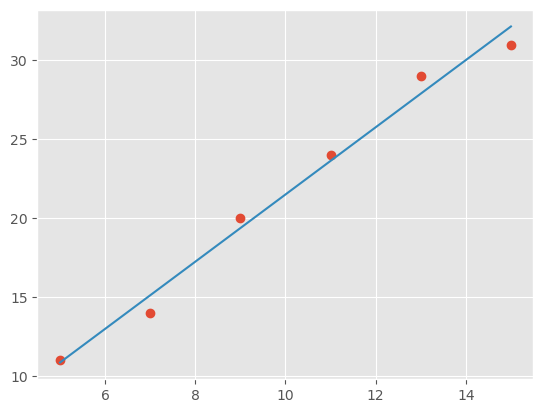

In [21]:
plt.plot(X,y,'o')
plt.plot(X,pred)
plt.show()

## Week 2: Generalisation
Want good performance for new data. How good the generalisation is is how well it performs on previously "unseen data"

Root-mean-squared error could be used to measure the generalisation. Do not check the generalisation of the model by using the data it was trained on.
Should have a training and a test set to evaluate our models.

**underfitting** = model cannot capture the underlying trend of the data. Often a result of an excessively simple model. Could be caused by poor training mechanisms or inappropriate loos function. 

**overfitting** = model captures the noise of the data. Often a result of an excessively complicated model or testing on the training data set.

### Process
1. Collect data - split in train and test
2. Pick a base model to use
3. Train the data on the model - tweaking the model
4. Test the model.

### Build a model
1. Import Linear Regression from SK Learn
2. Create a model called `lr`
3. Train (fit) `lr` on training data
4. Evaluate the model on the test set


In [22]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)

`train_test_split` is a method built into sklearn to split a dataset into training and test sets randomly.

In [23]:
from sklearn.model_selection import train_test_split


 will make a test size of 25% of the data (which is the default anyway). the return values will be numpy arrays.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

To see overfitting or underfitting compare the score for the training ser to the score for thee test set

In [26]:
lr.fit(X_train, y_train)
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)


If the training score is very poor then the model is underfit. If thee training score is much better than the test score then the model is overfit.

### Hyper parameters
 Hyper-parameters are parameters that are chosen rather than learned.

 Examples of Hyper-parameters are:
▪ the degree of your model, e.g. linear, quadratic, n-degree polynomial. Which features to 
use in your model? (Is every bit of information needed?) 
▪ the learning rate α
▪ the amount of Regularisation
▪ the number of layers/neurons in a Neural Network

### Often used procedure
Keeping the Test Data separate:
▪ Iterate through all possible hyper-parameters (e.g. polynomial M=1, then M=2, then M=3)
1. Fix the hyperparameter (M=1 to start) 
2. Randomly split the training data in k-folds
▪ Train a model using k − 1 folds of the dataset.
▪ Evaluate the model using the remaining fold.
▪ Record the error.
▪ Repeat until all folds have been a validation set.
3. Take the average error of all folds and store that result for the particular hyperparameter
4. Repeat from step 1, with the next hyperparameter
▪ Choose model (e.g. order of polynomial) with minimum (average) error on the folds
▪ (not always done but often) Retrain the model on the complete training data (training set 
+ validation set).
▪ You choose your model using validation, you can evaluate your final model with the 
test set


## Linear regression

In [27]:
import pandas as pd
from sklearn import datasets
diabetes = datasets.load_diabetes() #Import dataset and divide into X and y 
print(diabetes.DESCR)
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [28]:
from sklearn.model_selection import train_test_split
#Try some feature combinations
selected_features = ['sex', 'bmi', 'bp', 's3', 's5']
X_subset = X[selected_features].values

#Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=10)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score 

degrees = range(1, 6)  #Testing different polynomial degrees 
train_mean_scores = []  #Stores cross-validation R2 scores for each degree
test_scores = []        #Stores test set R2 scores for each degree
error_train = []        #Stores MSE for the training set for each degree
error_test = []        #Stores MSE for the test set for each degree

#Evaluate each degree by creating a polynomial regression model run cross-validation
for d in degrees:
    #Calculate the poly features
    X_train_poly = PolynomialFeatures(d).fit_transform(X_train)
    X_test_poly = PolynomialFeatures(d).fit_transform(X_test)
    model = LinearRegression()
    
    #Perform cross-validation on the training set and get the R2 score as above
    train_scores = cross_val_score(model, X_train_poly, y_train)
    train_score = train_scores.mean()
    train_mean_scores.append(train_score)
    
    #Fit the model on the poly training set and score on the poly test set
    model.fit(X_train_poly, y_train)
    mse_train = mean_squared_error(model.predict(X_train_poly), y_train)
    error_train.append(mse_train)    #Record MSE for training set
    test_score = model.score(X_test_poly, y_test)
    mse_test = mean_squared_error(model.predict(X_test_poly), y_test)
    error_train.append(mse_test)    #Record MSE for test set
    test_scores.append(test_score)
    
    #Display the train and test scores for each degree
    print(f"Degree {d}: Train CV Mean R^2 Score = {train_score:.3f}, Test R^2 Score = {test_score:.3f}, TRain MSE = {mse_train:.3f}, Test MSE = {mse_test:.3f}")


Degree 1: Train CV Mean R^2 Score = 0.479, Test R^2 Score = 0.521, TRain MSE = 2895.318, Test MSE = 2995.469
Degree 2: Train CV Mean R^2 Score = 0.487, Test R^2 Score = 0.472, TRain MSE = 2644.944, Test MSE = 3302.176
Degree 3: Train CV Mean R^2 Score = -1.089, Test R^2 Score = -0.634, TRain MSE = 13372.555, Test MSE = 10212.416
Degree 4: Train CV Mean R^2 Score = -5.110, Test R^2 Score = 0.061, TRain MSE = 4514.357, Test MSE = 5867.247
Degree 5: Train CV Mean R^2 Score = -263.831, Test R^2 Score = -7.990, TRain MSE = 16771.263, Test MSE = 56199.652


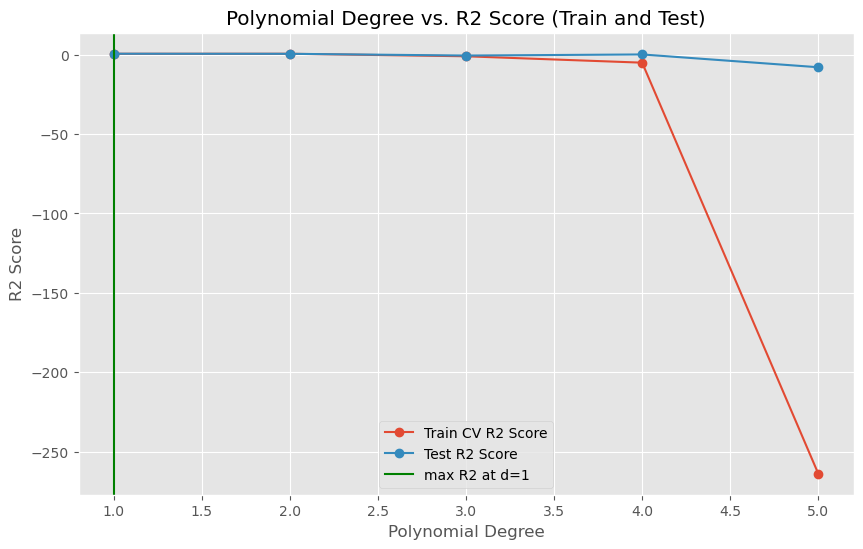

The optimal polynomial degree is 1 with a test R2 score of 0.521.


In [30]:
import matplotlib.pyplot as plt
import numpy as np

#Plot results 
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_mean_scores, marker='o', label='Train CV R2 Score')
plt.plot(degrees, test_scores, marker='o', label='Test R2 Score')
plt.xlabel('Polynomial Degree')
plt.ylabel('R2 Score')
plt.title('Polynomial Degree vs. R2 Score (Train and Test)')

#Find and display the best degree with the best R2 score on the test set
bestd = degrees[np.argmax(test_scores)]
plt.axvline(bestd, 0,1, color='g', label="max R2 at d=%d"%bestd)
plt.legend()
plt.show()
print(f"The optimal polynomial degree is {bestd} with a test R2 score of {max(test_scores):.3f}.")

The results above show that linear regression (degree 1) has superior performance than polynomial regression for the features I tested in the diabetes dataset. This means that the data likely follows a linear distribution.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X1_train = X_train[["age"]]
X1_test = X_test[["age"]]

In [33]:
model1 = LinearRegression()
scores = cross_val_score(model1, X1_train, y_train)
scores

array([ 2.41163784e-02,  9.93563234e-02,  2.97809168e-02,  4.96789943e-05,
       -1.12531282e-01])

In [34]:
scores.mean()

0.008154403137890464

## Logisitic regression
Is a classification model in Machine Learning. Something is either in category 0 or 1. The predicted value is a probability between 0 and 1. We can set the threshold to help in categorising. eg above 0.5 is a dog, but for malignant tumour we might set a different limit.

In [35]:
from sklearn.linear_model import LogisticRegression

the outputs of the model are:

`model.coef_` the slope of the line

`model.intercept_` where the line crosses the y axis

`model.score (X_test, y_test)` gives the accuracy of the model

`y_pred = model.predict(x_test)` this is calculated above in score, but this allows you to see the predicted values for y

`model.classes_` gives a list of the class labels known to the model

`model.predict_proba(X_test)` gives probability estimates for all the classes


Binary logisit regression requires the dependent variable to be binary. For a binary regression, the dependent variable should represent the desired outcome. Only the meaningful variables should be included. The independent vairables should be independent of each other. Logisitv regressions requires quite large sample sizes.

In [36]:
# Ipython command to prepare the notebook for matplotlib
%matplotlib inline

# Import libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_context('poster')

# Matplot lib argument for improved plots
from matplotlib import rcParams

#
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

For evaluating Classification algorithms, often people just see how accurate the 
predictions are on the test set

In [37]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


c:\Users\kirst\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


ValueError: X has 10 features, but LinearRegression is expecting 252 features as input.

If you just want the accuracy score you can use `model.score(X_test, y_test)`. this accuracy scores does not tell us how a calssifier perfromds for particular classes or the percentage of false positive or false negatives

### Precision and recall
▪ Precision: how many selected were correct.
▪ Recall: how many correct were found?


support is the number of occurrences of each class in y true.

### F1 - score
this a is a better metric when there are imbalanced calssed
IF we let P and R stand for precision and recall respectively then
F1 = (2.𝑃.𝑅)/(𝑃+R)

### Confusion matrix
Ci,j is equal to the number of 
observations known to be in group i but predicted to be in group j

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))    

NameError: name 'y_pred' is not defined

## K-Nearest neighbours
Can be used for regression or classification
Need a notation of 'distnace' to calculate the 'nearest' neighbour
Caution: Scale matters. If one predictor has is a much larger value than another, it 
will contribute more to the distance measurement.
with k = 5, we might want to predict a category for a point and find that the 
nearest five training points are green, green, red, green, red. 
▪ Take the most common and predict green

In [39]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.0


.If k is too small, you’ll overfit the training data. If it’s too large, you’ll underfit reality. So you can use k-fold cross validation to choose the k in k-nearest 
neighbours....this is confusing. They are two different k’s! We are choosing the hyperparameter k for k-nearest neighbours and you apply say a 10-fold cross validation procedure to choose it

### Lazy and eager learning
Lazy learning defers the computation of predictions until needed, relying on storing 
instance-specific information.
▪ Eager learning precomputes a model during training, making predictions faster but 
potentially requiring more memory



In [45]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
print(bc.data.shape)
print(bc.target.shape, np.unique(bc.target))
print(bc.feature_names)
X = bc.data
y = bc.target

(569, 30)
(569,) [0 1]
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Apply a randomly-chosen classifier and it does quite well

In [42]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

0.0
              precision    recall  f1-score   support

        37.0       0.00      0.00      0.00       1.0
        42.0       0.00      0.00      0.00       1.0
        48.0       0.00      0.00      0.00       2.0
        49.0       0.00      0.00      0.00       0.0
        52.0       0.00      0.00      0.00       2.0
        59.0       0.00      0.00      0.00       0.0
        60.0       0.00      0.00      0.00       1.0
        61.0       0.00      0.00      0.00       1.0
        63.0       0.00      0.00      0.00       2.0
        64.0       0.00      0.00      0.00       1.0
        67.0       0.00      0.00      0.00       1.0
        68.0       0.00      0.00      0.00       1.0
        69.0       0.00      0.00      0.00       1.0
        70.0       0.00      0.00      0.00       1.0
        71.0       0.00      0.00      0.00       0.0
        72.0       0.00      0.00      0.00       3.0
        77.0       0.00      0.00      0.00       1.0
        84.0       0.00

c:\Users\kirst\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kirst\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kirst\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\kirst\anaconda3\Lib\site-packages\sklea

In [46]:
model2 = KNeighborsClassifier(n_neighbors=9)
model2.fit(X_train, y_train)
print(model2.score(X_test, y_test))

0.0


The scales are completely different. Measuring “nearest” counts “mean radius” as 
much more important than “worst concavity”

In [47]:
bc_df = pd.DataFrame(bc.data, columns=bc.feature_names)
print(bc_df[['mean radius', 'texture error', 'worst concavity']].describe())

       mean radius  texture error  worst concavity
count   569.000000     569.000000       569.000000
mean     14.127292       1.216853         0.272188
std       3.524049       0.551648         0.208624
min       6.981000       0.360200         0.000000
25%      11.700000       0.833900         0.114500
50%      13.370000       1.108000         0.226700
75%      15.780000       1.474000         0.382900
max      28.110000       4.885000         1.252000


## Feature scaling
. That could mean scaling your data so:
▪ the smallest value is 0 and the largest is 1. 
▪ the mean is 0 and standard deviation is 1.
▪ something else that makes sense for your data
We build the transform into the model using make_pipeline


In [49]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=9))
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.0


▪ Sometimes we want to do a custom transform and build it into the model, for this we need a `FunctionTransformer`

In [ ]:
from sklearn.preprocessing import FunctionTransformer
def remove_correlation(X): X0 = X[:, 0]; X1 = X[:, 1]; return np.column_stack([X0, X1])

# Gradient descent
Ideal model minimises the error between the prediction and actual  in the training data, known as Loss function.

If you plot the loss you get a curved line.

To optimise the rate of Loss we can use calculus. to find where the slop equals 0.

## Batch gradient descent
Takes into accoutn every sample in the training set to calculate a single loss and then do an update

1. Initialise the weight w0 to something (random or 0)
2. Calculate the Loss function L(w0)
3. Find the gradient of L(w0)
4. Calculation w1 = w0 - alphaDELTAL(w0)
5. Repeat
6. Stop when minimum reached

In multiple dimensions the gradient is the vector of "Slopes". Symbolised by dL / Dwo
The gradient is the direction of the greatest increase so we multiply by -1 to get the minimum and is the vector formed by taking all the partial derivatives.
Work the gradients independently and then take cross-wise steps and applying it simultaneously.

Tension in gradient descent configurations of computation efficient and the fidelity of the error gradient

VariationsL
* stochastic gradient descent (SGD)
* mini-batch gradient descent

## 



